In [1]:
import os
os.chdir("/Users/ryoheinamiki515/NLP-text-content-clustering")

%load_ext autoreload
%autoreload 2
%aimport src

In [2]:
from src.data import make_dataset
import numpy as np

In [3]:
articles = [
    "Machine Learning", "Computer Science", "Statistics", "Mathematics",
    "Blue", "Red", "Green", "Purple",
    "Google", "Amazon (company)", "Facebook", "Microsoft",
    "Korea", "Japan", "Mexico", "United States",
    "Barack Obama", "Donald Trump", "Bill Clinton", "Hillary Clinton",
    "Tennis", "Football", "American Football", "Basketball", "Baseball"
]

In [4]:
text_data, labels = make_dataset.from_wiki(articles, summary=False)

['Machine Learning', 'Computer Science', 'Statistics', 'Mathematics', 'Blue', 'Red', 'Green', 'Purple', 'Google', 'Amazon (company)', 'Facebook', 'Microsoft', 'Korea', 'Japan', 'Mexico', 'United States', 'Barack Obama', 'Donald Trump', 'Bill Clinton', 'Hillary Clinton', 'Tennis', 'Football', 'American Football', 'Basketball', 'Baseball']


In [5]:
clean_data, changed_to_original = make_dataset.clean_data(text_data)

In [6]:
from src.models import train_model

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [33]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_data)

In [50]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X_embedded = TSNE(n_components=2, perplexity=8, n_iter=5000).fit_transform(X)

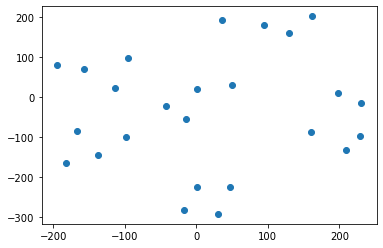

In [51]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

In [52]:
kmeans = KMeans(n_clusters=6)

In [53]:
kmeans.fit(X)

KMeans(n_clusters=6)

In [54]:
centers_ordered = kmeans.cluster_centers_.argsort()[:, ::-1] 
for i in range(kmeans.n_clusters):
    indices = np.where(kmeans.labels_ == i)[0]
    cluster_labels = [labels[i] for i in indices]
    print(f"Cluster #{i}:", ", ".join(cluster_labels))
    prominent_words = changed_to_original.loc[np.array(vectorizer.get_feature_names())[centers_ordered[i][:5]]].unique()
    print("Prominent words:", ", ".join(prominent_words))
    print("==============================\n")

Cluster #0: Mathematics, Machine_Learning, Statistics, Computer_Science
Prominent words: mathematics, mathematical, mathematic, mathematically, computation, computer, computations, computability, computational, computers, computing, compute, computes, computationally, computed, computics, computable, statistics, statistical, statistically, statistic, learning, learn, learned, learns, data

Cluster #1: Mexico, Japan, United_States, Korea
Prominent words: japan, japanization, mexico, state, states, stated, stating, stately, korean, koreans, korea, koreas

Cluster #2: Microsoft, Amazon_(company), Google, Facebook
Prominent words: google, googl, amazon, microsoft, facebook, facebooks, user, users

Cluster #3: Tennis, American_Football, Football, Basketball, Baseball
Prominent words: ball, balls, balles, players, player, football, footballers, footballs, basketball, play, playing, plays, played, playfulness, playes, playe

Cluster #4: Donald_Trump, Barack_Obama, Bill_Clinton, Hillary_Clinto

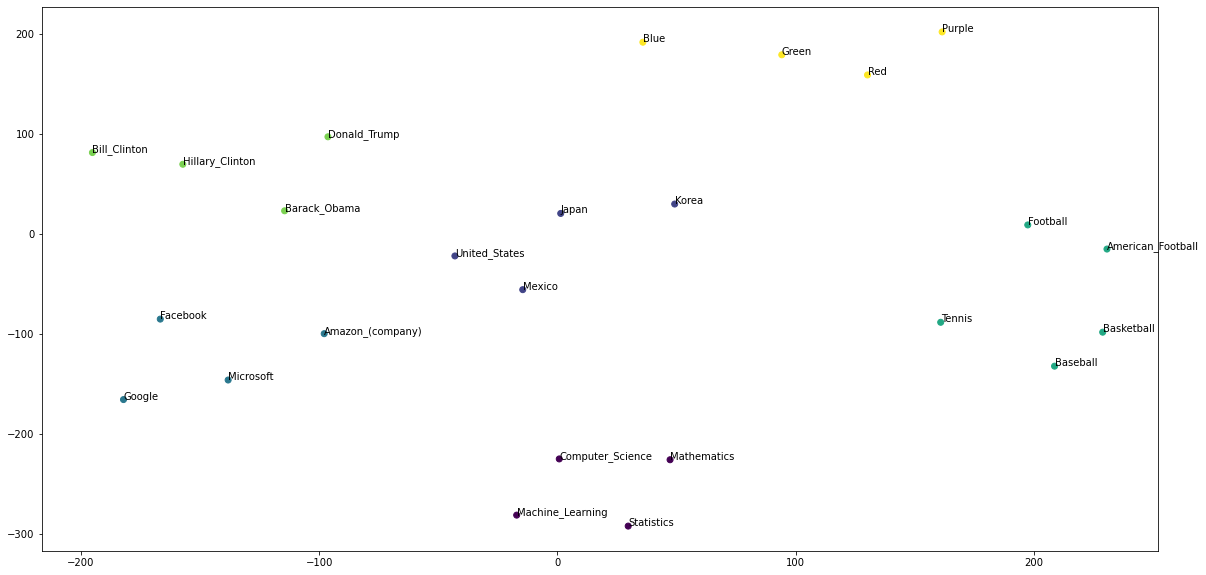

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=kmeans.labels_, cmap='viridis')
for i, txt in enumerate(labels):
    ax.annotate(txt, (X_embedded[:, 0][i], X_embedded[:, 1][i]))